In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random

In [2]:
businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=200000)
reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=200000)

In [3]:
for business in businesses:
    business_chunk = business
    break

for review in reviews:
    review_chunk = review
    break

In [4]:
a = business_chunk[business['categories'].str.contains('Restaurant') == True]
rev = review_chunk[review_chunk.business_id.isin(a['business_id']) == True]

In [5]:
def equal_sample(df, target_column, sample_size):
    grouped = df.groupby(target_column, group_keys=False)
    sampled_df = grouped.apply(lambda x: x.sample(min(len(x), sample_size)))
    return sampled_df

In [6]:
df = equal_sample(rev, 'stars', 12000)

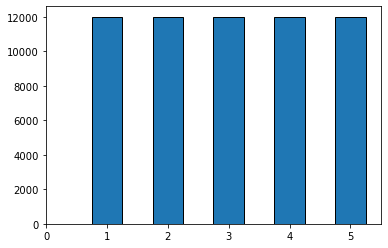

In [7]:
plt.hist(df['stars'], range=(0.25, 5.25), edgecolor='black')
plt.show()

In [8]:
df = df.sample(frac=1, random_state=42)

In [9]:
df.to_csv('shuffled_reviews.csv', index = False, encoding='utf-8') # False: not include index